<a href="https://colab.research.google.com/github/Spoorthi-2005/codsoft-task4-creditcard-analysis/blob/main/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Class imbalance detected. Using undersampling.
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        99
           1       0.97      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

Confusion Matrix:
[[96  3]
 [11 87]]
Accuracy: 0.9289340101522843


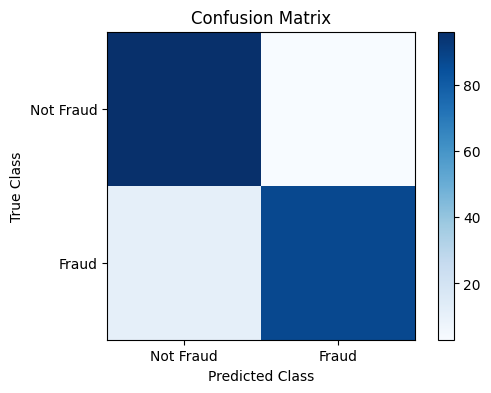

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/iris/creditcard.csv')

# Drop rows with NaN values in the target variable 'Class'
data.dropna(subset=['Class'], inplace=True)

# Perform data preprocessing
scaler = StandardScaler()
data[['Amount', 'Time']] = scaler.fit_transform(data[['Amount', 'Time']])

# Split the dataset into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Determine if oversampling or undersampling is required
class_counts = y.value_counts()
if class_counts[0] > class_counts[1]:
    print("Class imbalance detected. Using undersampling.")
    sampler = RandomUnderSampler(random_state=42)
else:
    print("Class imbalance detected. Using oversampling.")
    sampler = SMOTE(random_state=42)

# Resample the dataset to handle class imbalance
X_resampled, y_resampled = sampler.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(confusion_matrix(y_test, y_pred), cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.yticks([0, 1], ['Not Fraud', 'Fraud'])
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()
